In [1]:
using Plots, LinearAlgebra

In [2]:
x = 0:0.01:1
y = x
g(x) = 2.5*x*(1-x) # <--- The Logisitic Map!
#g(x) = cos(x)
y2 = g.(x);

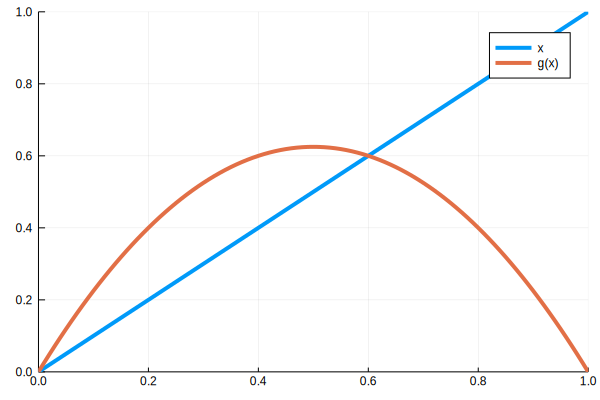

In [3]:
plot(x,y,linewidth=4,label="x",xlimit=(0,1),ylimit=(0,1))
plot!(x,y2,linewidth=4,label="g(x)")

In [18]:
tempx = 3.0
g(tempx)

-15.0

In [20]:
g(g(g(g(g(tempx)))))

-1.032010019466183e25

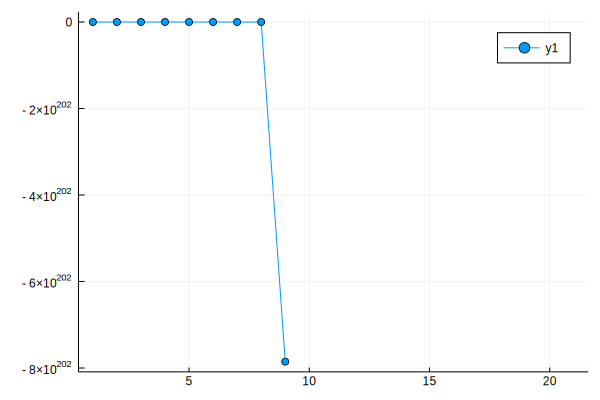

In [22]:
z = [3.0]
for i = 1:20
    push!(z,g(z[end]))
end
plot(z,marker=:circle)

In [7]:
T = 10
A = 0.1 * rand(T,T) + 0.5 * diagm(ones(T)) # This makes a diagonally dominant matrix

10×10 Array{Float64,2}:
 0.556235    0.0754272  0.0303512   …  0.0242148   0.0561003   0.0709961
 0.0961684   0.554555   0.0127987      0.0476185   0.0774718   0.084843 
 0.0452056   0.0407316  0.526015       0.00155914  0.00401298  0.0140352
 0.00587957  0.0499606  0.0363179      0.0069377   0.0757211   0.0199939
 0.0663159   0.0980309  0.00795468     0.0925727   0.0355484   0.0909397
 0.00993483  0.0198461  0.041801    …  0.0537656   0.0714458   0.0884915
 0.0358779   0.082517   0.0914064      0.0614763   0.0226303   0.0793216
 0.00266746  0.0540462  0.0912324      0.512731    0.0810997   0.0644185
 0.0933702   0.0833513  0.0502762      0.080532    0.501574    0.0225372
 0.0298461   0.0904451  0.0342776      0.0330198   0.0809114   0.549097 

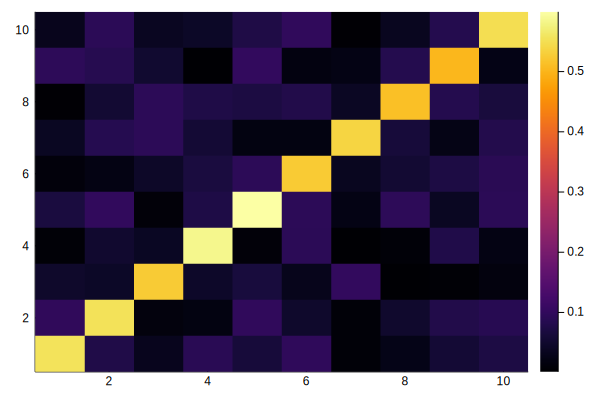

In [8]:
heatmap(A)

In [9]:
b = A * ones(T)

10-element Array{Float64,1}:
 1.0650954744949934
 1.0406711844351113
 0.8665061907747115
 0.8799160504630612
 1.175570676843738 
 1.0012421304693855
 1.0013554132227291
 1.0640008848159754
 0.9701330720908825
 1.032305718217622 

In [11]:
D = diagm(diag(A))

10-element Array{Float64,1}:
 0.5562346365417693
 0.5545554434888338
 0.5260146455876598
 0.5854293924336793
 0.5992810903096341
 0.5249730295514227
 0.5370760234979413
 0.5127307978442056
 0.5015735921818804
 0.5490968975228051

In [12]:
inv(D)

10×10 Array{Float64,2}:
 1.7978  0.0      0.0      0.0      …  0.0      0.0      0.0      0.0    
 0.0     1.80325  0.0      0.0         0.0      0.0      0.0      0.0    
 0.0     0.0      1.90109  0.0         0.0      0.0      0.0      0.0    
 0.0     0.0      0.0      1.70815     0.0      0.0      0.0      0.0    
 0.0     0.0      0.0      0.0         0.0      0.0      0.0      0.0    
 0.0     0.0      0.0      0.0      …  0.0      0.0      0.0      0.0    
 0.0     0.0      0.0      0.0         1.86193  0.0      0.0      0.0    
 0.0     0.0      0.0      0.0         0.0      1.95034  0.0      0.0    
 0.0     0.0      0.0      0.0         0.0      0.0      1.99373  0.0    
 0.0     0.0      0.0      0.0         0.0      0.0      0.0      1.82117

In [15]:
L = A - D

10×10 Array{Float64,2}:
 0.0         0.0754272  0.0303512   …  0.0242148   0.0561003   0.0709961
 0.0961684   0.0        0.0127987      0.0476185   0.0774718   0.084843 
 0.0452056   0.0407316  0.0            0.00155914  0.00401298  0.0140352
 0.00587957  0.0499606  0.0363179      0.0069377   0.0757211   0.0199939
 0.0663159   0.0980309  0.00795468     0.0925727   0.0355484   0.0909397
 0.00993483  0.0198461  0.041801    …  0.0537656   0.0714458   0.0884915
 0.0358779   0.082517   0.0914064      0.0614763   0.0226303   0.0793216
 0.00266746  0.0540462  0.0912324      0.0         0.0810997   0.0644185
 0.0933702   0.0833513  0.0502762      0.080532    0.0         0.0225372
 0.0298461   0.0904451  0.0342776      0.0330198   0.0809114   0.0      

In [14]:
tempx = zeros(10)

10-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [16]:
tempx = inv(D) * ( b - L*tempx )

10-element Array{Float64,1}:
 1.9148312681801367
 1.8765863659871653
 1.6473043061503678
 1.503026772887463 
 1.9616348585875603
 1.907225846106654 
 1.864457487230516 
 2.0751647634384436
 1.934178926507545 
 1.8800064667543461

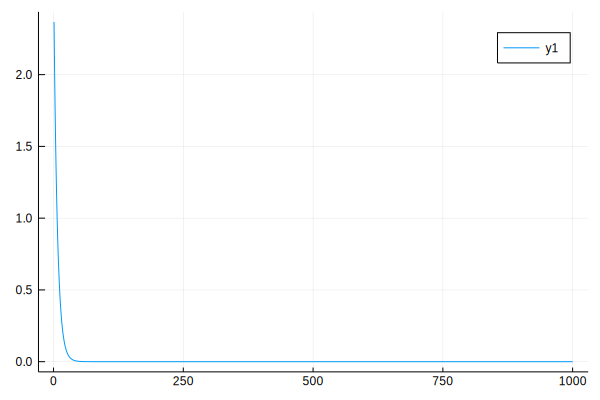

In [17]:
error = []
for i = 1:1000
    tempx = inv(D) * ( b - L*tempx )
    push!(error,norm(ones(T)-tempx))
end
plot(error)